# Simulación Monte Carlo - Teoría de Colas M/M/s

In [1]:
# Importación de las librerias

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [2]:
# Parámetros del sistema

lambda_llegadas = 7 / 60
mu_servicios = 10 / 60
num_servidores = 10
num_clientes = 100

In [3]:
# Simulacion de tiempos entre llegadas y tiempos de servicio

tiempos_entre_llegadas = np.random.exponential(1/lambda_llegadas, num_clientes)
tiempos_llegada = np.cumsum(tiempos_entre_llegadas)
tiempos_servicio = np.random.exponential(1/mu_servicios, num_clientes)

In [4]:
tiempos_llegada

array([3.13295305e-01, 1.40688299e+01, 1.80613259e+01, 2.14552851e+01,
       2.48374716e+01, 3.57871794e+01, 4.07524723e+01, 4.54990705e+01,
       5.51843020e+01, 5.87859368e+01, 7.49430257e+01, 7.85936305e+01,
       9.36538567e+01, 1.13166417e+02, 1.29107293e+02, 1.59677247e+02,
       1.72523136e+02, 1.84801982e+02, 1.90758047e+02, 2.10575191e+02,
       2.25719933e+02, 2.26765802e+02, 2.26912226e+02, 2.36697853e+02,
       2.55937856e+02, 2.69327449e+02, 2.73629776e+02, 2.77235547e+02,
       2.91826441e+02, 2.94918638e+02, 2.95446232e+02, 2.96729479e+02,
       3.09917313e+02, 3.25502917e+02, 3.26902706e+02, 3.27181403e+02,
       3.39661578e+02, 3.41640280e+02, 3.45817760e+02, 3.65742620e+02,
       3.79591766e+02, 4.00589294e+02, 4.09623574e+02, 4.12242827e+02,
       4.16488689e+02, 4.18101650e+02, 4.21412306e+02, 4.22678257e+02,
       4.31819710e+02, 4.60471276e+02, 5.00428222e+02, 5.09269869e+02,
       5.16901994e+02, 5.44189008e+02, 5.46652597e+02, 5.56026122e+02,
      

In [5]:
tiempos_servicio

array([ 6.24795907,  5.15883673,  6.91917613,  1.10253134, 17.15010723,
        8.1224123 ,  6.96622241,  6.94924474,  4.93717377,  0.81064743,
        2.85904012,  1.7169263 ,  3.52594931,  0.6303305 ,  5.41052374,
        8.24423059,  6.92435702,  5.78844403,  1.20731426,  4.03758014,
        0.44510035,  5.60680938,  1.02406668,  5.85674548, 12.21510071,
        2.51095456,  1.16589537,  7.08630314,  6.2308046 ,  4.36840929,
       25.28343845,  8.55861738, 12.74867565, 26.98349215, 10.5418831 ,
        5.63398232,  0.29134341,  0.14063281,  6.38220762, 19.93306614,
        5.47221922,  6.16614578,  3.42579431,  4.79598867, 13.07933701,
       10.10429361,  7.75225958, 14.58165118,  3.03236298,  7.26607489,
        1.04993636,  7.32163172,  1.63192814,  3.64762293, 11.63514958,
        3.08352777,  0.29772457,  1.48986154, 18.9093456 ,  3.85660923,
        7.42017179, 13.38398928, 15.16155542,  2.65136331,  1.41811719,
        1.75962288,  4.04200377, 22.22172563,  0.52677446,  3.22

In [6]:
# Inicializar Variables

eventos_servidores = PriorityQueue() # Cola de prioridad para manejar la disponibilidad de servidores
tiempo_inicio_servicio = []
tiempo_espera = []
tiempo_salida = []
servidor_asignado = []

# Inicializamos la cola con la disponibilidad de los servidores en tiempo 0

for i in range(num_servidores):
    eventos_servidores.put((0, i))
    
# Simulacion de eventos para cada cliente

for i in range(num_clientes):
    llegada = tiempos_llegada[i]
    
    tiempo_servidor_libre, id_servidor = eventos_servidores.get()
    
    # Determinar cuando se puede comenzar el servicio
    
    inicio_servicio = max(llegada, tiempo_servidor_libre)
    espera = inicio_servicio - llegada
    salida = inicio_servicio + tiempos_servicio[i]
    
    # Registrar los datos
    tiempo_inicio_servicio.append(inicio_servicio)
    tiempo_espera.append(espera)
    tiempo_salida.append(salida)
    servidor_asignado.append(id_servidor)
    
    # Actualizar la disponibilidad del servidor
    eventos_servidores.put((salida, id_servidor))
    
# Crea el DataFrame con los resultados
df_clientes = pd.DataFrame({
    'Clientes': range(1, num_clientes + 1),
    'Tiempo_Llegada': tiempos_llegada,
    'Tiempo_Servicio': tiempos_servicio,
    'Inicio_Servicio': tiempo_inicio_servicio,
    'Tiempo_Espera': tiempo_espera,
    'Tiempo_Salida': tiempo_salida,
    'Tiempo_En_Sistema': np.array(tiempo_salida) - np.array(tiempos_llegada),
    'Servidor_Asignado': servidor_asignado
})   


In [7]:
print('Resumen de Clientes Simulados')
df_clientes

Resumen de Clientes Simulados


,Clientes,Tiempo_Llegada,Tiempo_Servicio,Inicio_Servicio,Tiempo_Espera,Tiempo_Salida,Tiempo_En_Sistema,Servidor_Asignado
0,1,0.313295,6.247959,0.313295,0.0,6.561254,6.247959,0
1,2,14.068830,5.158837,14.068830,0.0,19.227667,5.158837,1
2,3,18.061326,6.919176,18.061326,0.0,24.980502,6.919176,2
3,4,21.455285,1.102531,21.455285,0.0,22.557816,1.102531,3
4,5,24.837472,17.150107,24.837472,0.0,41.987579,17.150107,4
...,...,...,...,...,...,...,...,...
95,96,790.313292,3.740732,790.313292,0.0,794.054024,3.740732,4
96,97,800.800714,3.680491,800.800714,0.0,804.481205,3.680491,7
97,98,801.086079,12.795064,801.086079,0.0,813.881142,12.795064,2
98,99,805.294833,0.513069,805.294833,0.0,805.807902,0.513069,3


In [8]:
# Métricas del sistema
promedio_espera = df_clientes['Tiempo_Espera'].mean()
promedio_en_sistema = df_clientes['Tiempo_En_Sistema'].mean()
utilizacion_servidor = sum(df_clientes['Tiempo_Servicio']) / (num_servidores * df_clientes['Tiempo_Salida'].max())

print(f"\nMétricas del Sistema de Colas M/M/{num_servidores}:")
print(f"Tiempo promedio de espera en cola: {promedio_espera:.2f}")
print(f"Tiempo promedio en el sistema: {promedio_en_sistema:.2f}")
print(f"Utilización del sistema (servidores): {utilizacion_servidor:.2%}")


Métricas del Sistema de Colas M/M/10:
Tiempo promedio de espera en cola: 0.00
Tiempo promedio en el sistema: 6.25
Utilización del sistema (servidores): 7.58%


In [9]:
rho = lambda_llegadas / mu_servicios
rho

0.7000000000000001

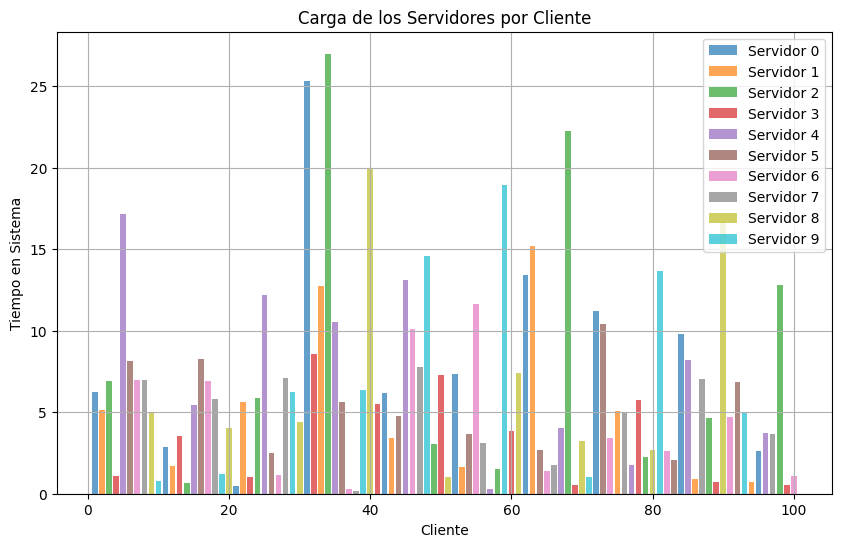

In [10]:
# Visualización de la carga de los servidores
plt.figure(figsize=(10, 6))
for s in range(num_servidores):
    df_servidor = df_clientes[df_clientes['Servidor_Asignado'] == s]
    plt.bar(df_servidor['Clientes'], df_servidor['Tiempo_En_Sistema'], label=f'Servidor {s}', alpha=0.7)

plt.title('Carga de los Servidores por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Tiempo en Sistema')
plt.legend()
plt.grid(True)
plt.show()